This code creates plots for quantities in dependence of densities of passive particles.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.optimize import curve_fit
import csv

In [2]:
#set plot parameters

#change figure size
figure_size = plt.rcParams["figure.figsize"]
figure_size[0] = 12
figure_size[1] = 6
plt.rcParams['figure.figsize'] = figure_size

#set line width
plt.rcParams['lines.linewidth'] = 2

#set label size in the plots
plt.rcParams.update({'font.size': 18})

In [3]:
#create lists for quantities for graphical representation (plots)
list_of_densities = []

list_of_sq_end_to_end_distances = []
list_of_sq_end_to_end_distances_err = []

list_of_power_of_time_in_diffusion = []
list_of_power_of_time_in_diffusion_err = []

list_of_power_of_relax_exponent = []
list_of_power_of_relax_exponent_err = []

averaged_quantities = open('averages_for_plots_different_densities','r')
lines = csv.reader(averaged_quantities, delimiter='	')

for line in lines:

        #time has to be multiplied by dt, otherwise it is number of timesteps
        list_of_densities.append(float(line[0]))

        list_of_sq_end_to_end_distances.append(float(line[1]))
        list_of_sq_end_to_end_distances_err.append(float(line[2]))
        
        list_of_power_of_time_in_diffusion.append(float(line[3]))
        list_of_power_of_time_in_diffusion_err.append(float(line[4]))
        
        list_of_power_of_relax_exponent.append(float(line[5]))
        list_of_power_of_relax_exponent_err.append(float(line[6]))

#close the file
averaged_quantities.close()

# Create the plot (sq. end-to-end distances)

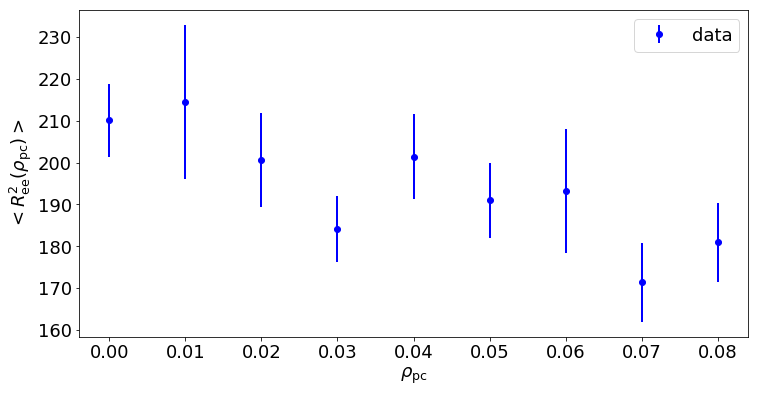

In [4]:
#covert arrays into numpy arrays and use short names (use x and y)
x = np.array(list_of_densities)
y = np.array(list_of_sq_end_to_end_distances)
y_err = np.array(list_of_sq_end_to_end_distances_err)



#plot the results, #Attention: <R_ee^2> depends on BONDS!
plt.errorbar(x, y, y_err, color='blue', marker='o', label='data', fmt='.')

#save the plot
plt.legend(loc='best')

#plt.xscale('log')

#set ticks
#plt.yscale('log')
plt.xlabel(r'$\rho_{\mathrm{pc}}$')
plt.ylabel(r'$<R_{\mathrm{ee}}^2(\rho_{\mathrm{pc}})>$')
plt.draw()
plt.savefig('sq_distance_in_dependence_of_density.png')
plt.show()
plt.close()

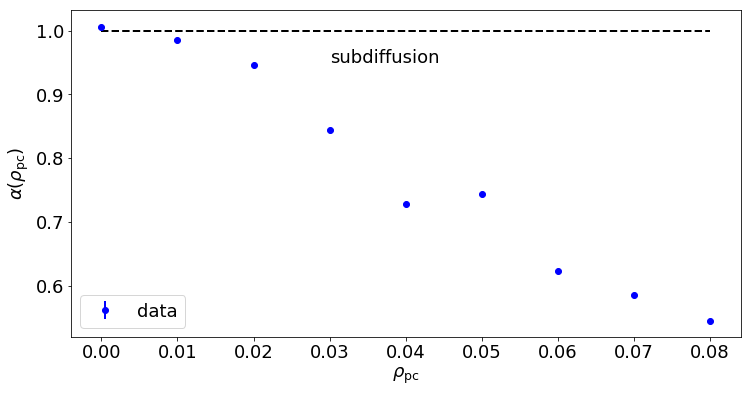

In [5]:
#covert arrays into numpy arrays and use short names (use x and y)
x = np.array(list_of_densities)
y = np.array(list_of_power_of_time_in_diffusion)
y_err = np.array(list_of_power_of_time_in_diffusion_err)



#plot the results, #Attention: <R_ee^2> depends on BONDS!
plt.errorbar(x, y, y_err, color='blue', marker='o', label='data', fmt='.')

#save the plot
plt.legend(loc='best')

#plt.xscale('log')
plt.plot(x, 0*x+1, color='black', linestyle='--')
plt.annotate('subdiffusion', xy=(0.03, 0.95), xytext=(0.03, 0.95))
#plt.annotate('superdiffusion', xy=(0.155, 1.02), xytext=(0.155, 1.02))
#set ticks
#plt.yscale('log')
plt.xlabel(r'$\rho_{\mathrm{pc}}$')
plt.ylabel(r'$\alpha(\rho_{\mathrm{pc}})$')
plt.draw()
plt.savefig('power_of_time_in_diffusion_dependence_of_density.png')
plt.show()
plt.close()

$\alpha$ in the plot above is regarding: $\sigma^2_{\text{cm}}(t)\,\propto\,t^\alpha$.

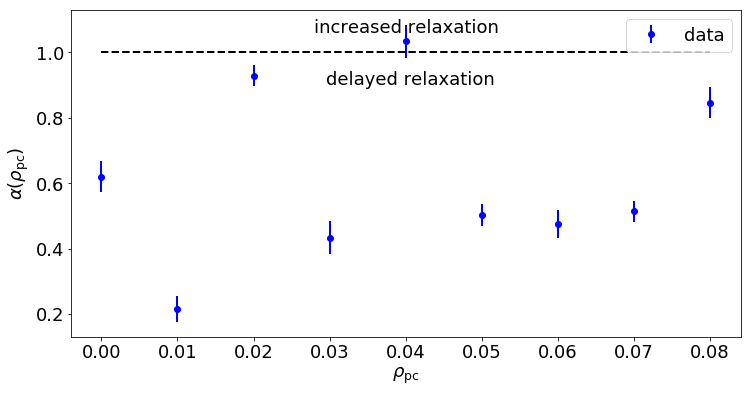

In [6]:
#covert arrays into numpy arrays and use short names (use x and y)
x = np.array(list_of_densities)
y = np.array(list_of_power_of_relax_exponent)
y_err = np.array(list_of_power_of_relax_exponent_err)



#plot the results, #Attention: <R_ee^2> depends on BONDS!
plt.errorbar(x, y, y_err, color='blue', marker='o', label='data', fmt='.')

plt.plot(x, 0*x+1, color='black', linestyle='--')
plt.annotate('delayed relaxation', xy=(0.0295, 0.9), xytext=(0.0295, 0.9))
plt.annotate('increased relaxation', xy=(0.028, 1.06), xytext=(0.028, 1.06))

#save the plot
plt.legend(loc='best')

#plt.xscale('log')

#set ticks
#plt.yscale('log')
plt.xlabel(r'$\rho_{\mathrm{pc}}$')
plt.ylabel(r'$\alpha(\rho_{\mathrm{pc}})$')
plt.draw()
plt.savefig('power_of_relax_exponent_in_dependence_of_density.png')
plt.show()
plt.close()

$\alpha$ in the plot above arises from $\phi(t)\,\propto\,\text{exp}(-\,(t/\tau_{\text{relax}})^\alpha)$.